In [5]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from ivae_scorer.utils import set_all_seeds
import seaborn as sns
import dotenv
from pathlib import Path
import numpy as np
import pandas as pd

project_path = Path(dotenv.find_dotenv()).parent
results_path = project_path.joinpath("results")
data_path = project_path.joinpath("data")
figs_path = results_path.joinpath("figs")
tables_path = results_path.joinpath("tables")

set_all_seeds(seed=42)

tf.config.experimental.enable_op_determinism()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
config = dotenv.dotenv_values()
frac_list = np.arange(
    float(config["FRAC_START"]), float(config["FRAC_STOP"]), float(config["FRAC_STEP"])
)
frac_list

array([0.1])

In [7]:
models = ["ivae_kegg", "ivae_reactome"] + [
    f"ivae_random-{frac:.1f}" for frac in frac_list
]

In [8]:
# Metrics

metric_scores = [
    pd.read_pickle(results_path.joinpath(m, "scores_metrics.pkl")) for m in models
]
metric_scores = pd.concat(metric_scores, axis=0, ignore_index=True)
metric_scores = metric_scores.query("metric=='mse'")
# metric_scores["model"] = metric_scores["model"].str[-2:]
# metric_scores["score"] = metric_scores["score"].apply(lambda x: -np.log2(x))
metric_scores.head()

,seed,metric,split,score,model
1,0,mse,train,0.000786,ivae_kegg
3,0,mse,val,0.000790,ivae_kegg
5,0,mse,test,0.000785,ivae_kegg
7,1,mse,train,0.000798,ivae_kegg
9,1,mse,val,0.000805,ivae_kegg


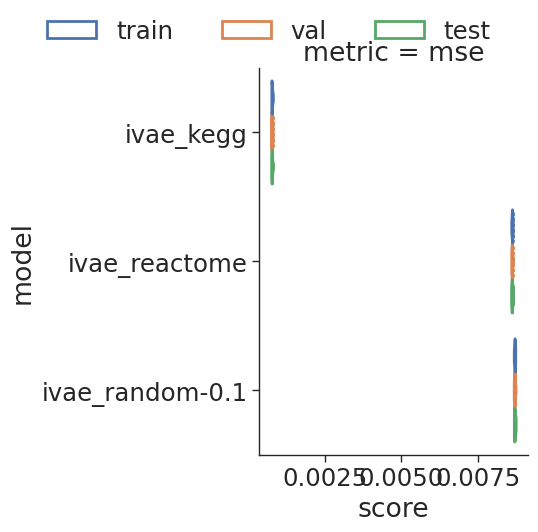

In [9]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="paper", font_scale=2, style="ticks", rc=custom_params)
fac = 0.6

g = sns.catplot(
    data=metric_scores,
    kind="violin",
    col="metric",
    height=9 * fac,
    aspect=16 / 9 * fac,
    sharey=False,
    sharex=False,
    y="model",
    x="score",
    hue="split",
    split=False,
    cut=0,
    fill=False,
    density_norm="count",
    inner="quart",
    linewidth=2,
    legend_out=False,
)

sns.move_legend(
    g,
    "lower center",
    bbox_to_anchor=(0.5, 0.9),
    ncol=3,
    title=None,
    frameon=False,
)

In [10]:
# clustering

clustering_scores = [
    pd.read_pickle(results_path.joinpath(m, "scores_clustering.pkl")) for m in models
]
clustering_scores = pd.concat(clustering_scores, axis=0, ignore_index=True)
clustering_scores.head()

,split,layer,score,model
0,train,1,0.449563,ivae_kegg
1,train,1,0.422944,ivae_kegg
2,train,1,0.392982,ivae_kegg
3,train,1,0.355757,ivae_kegg
4,train,1,0.451032,ivae_kegg


In [11]:
clustering_scores.groupby(["model", "layer"]).size()

model            layer
ivae_kegg        1        30
                 2        30
ivae_random-0.1  1        30
ivae_reactome    1        30
dtype: int64

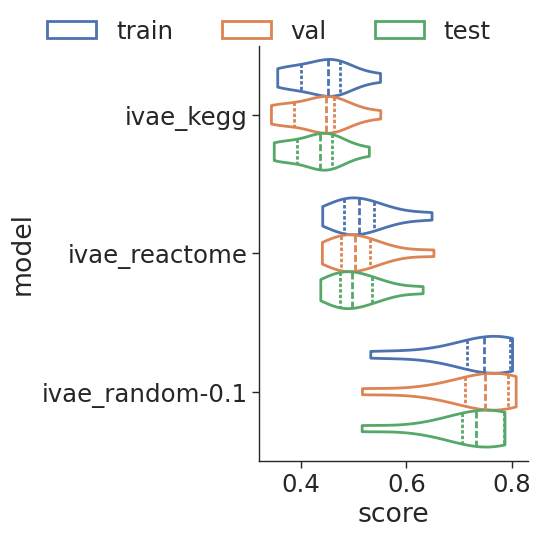

In [12]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="paper", font_scale=2, style="ticks", rc=custom_params)
fac = 0.6

g = sns.catplot(
    data=clustering_scores.query("layer==1"),
    kind="violin",
    height=9 * fac,
    aspect=16 / 9 * fac,
    sharey=True,
    x="score",
    y="model",
    hue="split",
    split=False,
    cut=0,
    fill=False,
    density_norm="count",
    inner="quart",
    linewidth=2,
    legend_out=False,
)

sns.move_legend(
    g,
    "lower center",
    bbox_to_anchor=(0.5, 0.91),
    ncol=3,
    title=None,
    frameon=False,
)

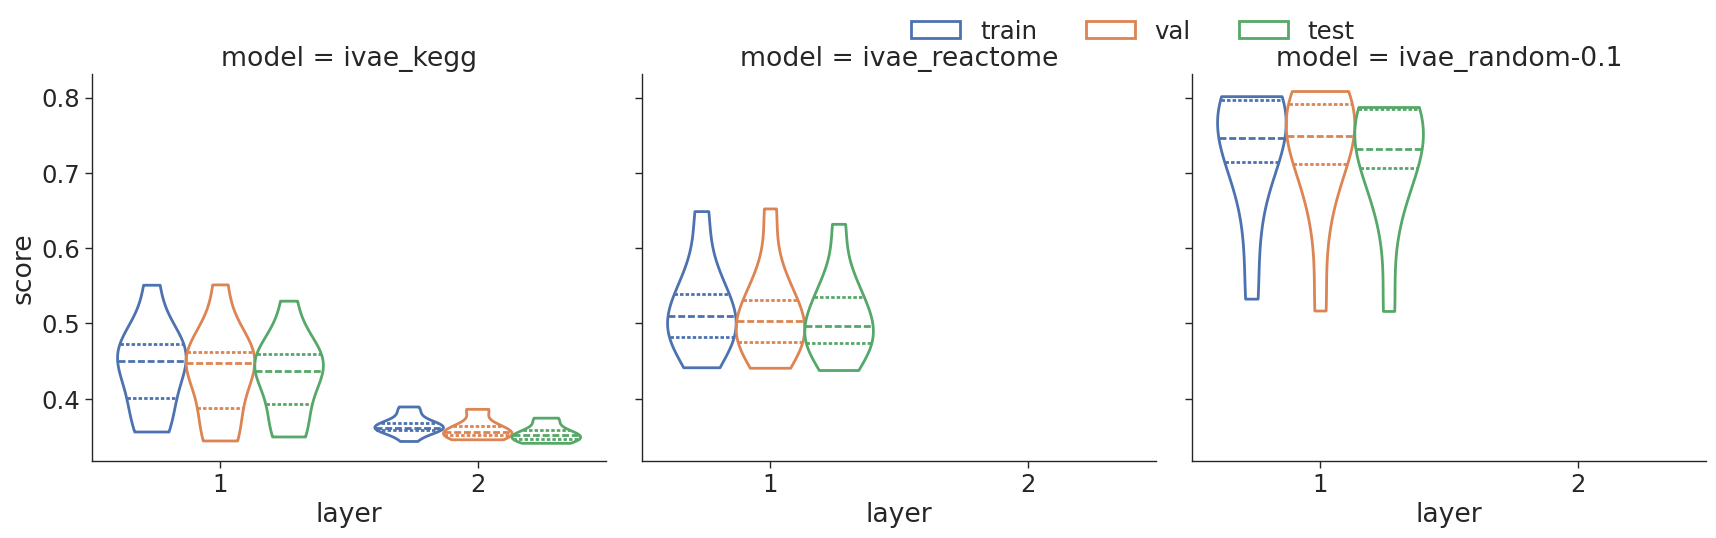

In [13]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="paper", font_scale=2, style="ticks", rc=custom_params)
fac = 0.6

g = sns.catplot(
    data=clustering_scores,
    kind="violin",
    col="model",
    height=9 * fac,
    aspect=16 / 9 * fac,
    sharey=True,
    x="layer",
    y="score",
    hue="split",
    split=False,
    cut=0,
    fill=False,
    density_norm="count",
    inner="quart",
    linewidth=2,
    legend_out=False,
    col_wrap=4,
)

sns.move_legend(
    g,
    "lower center",
    bbox_to_anchor=(0.5, 0.91),
    ncol=3,
    title=None,
    frameon=False,
)

In [14]:
# informed

informed_scores = [
    pd.read_pickle(results_path.joinpath(m, "scores_informed.pkl")) for m in models
]
informed_scores = pd.concat(informed_scores, axis=0, ignore_index=True)
informed_scores.head()

,split,layer,score,model
0,train,1,0.787101,ivae_kegg
1,train,1,0.728475,ivae_kegg
2,train,1,0.783498,ivae_kegg
3,train,1,0.769732,ivae_kegg
4,train,1,0.797193,ivae_kegg


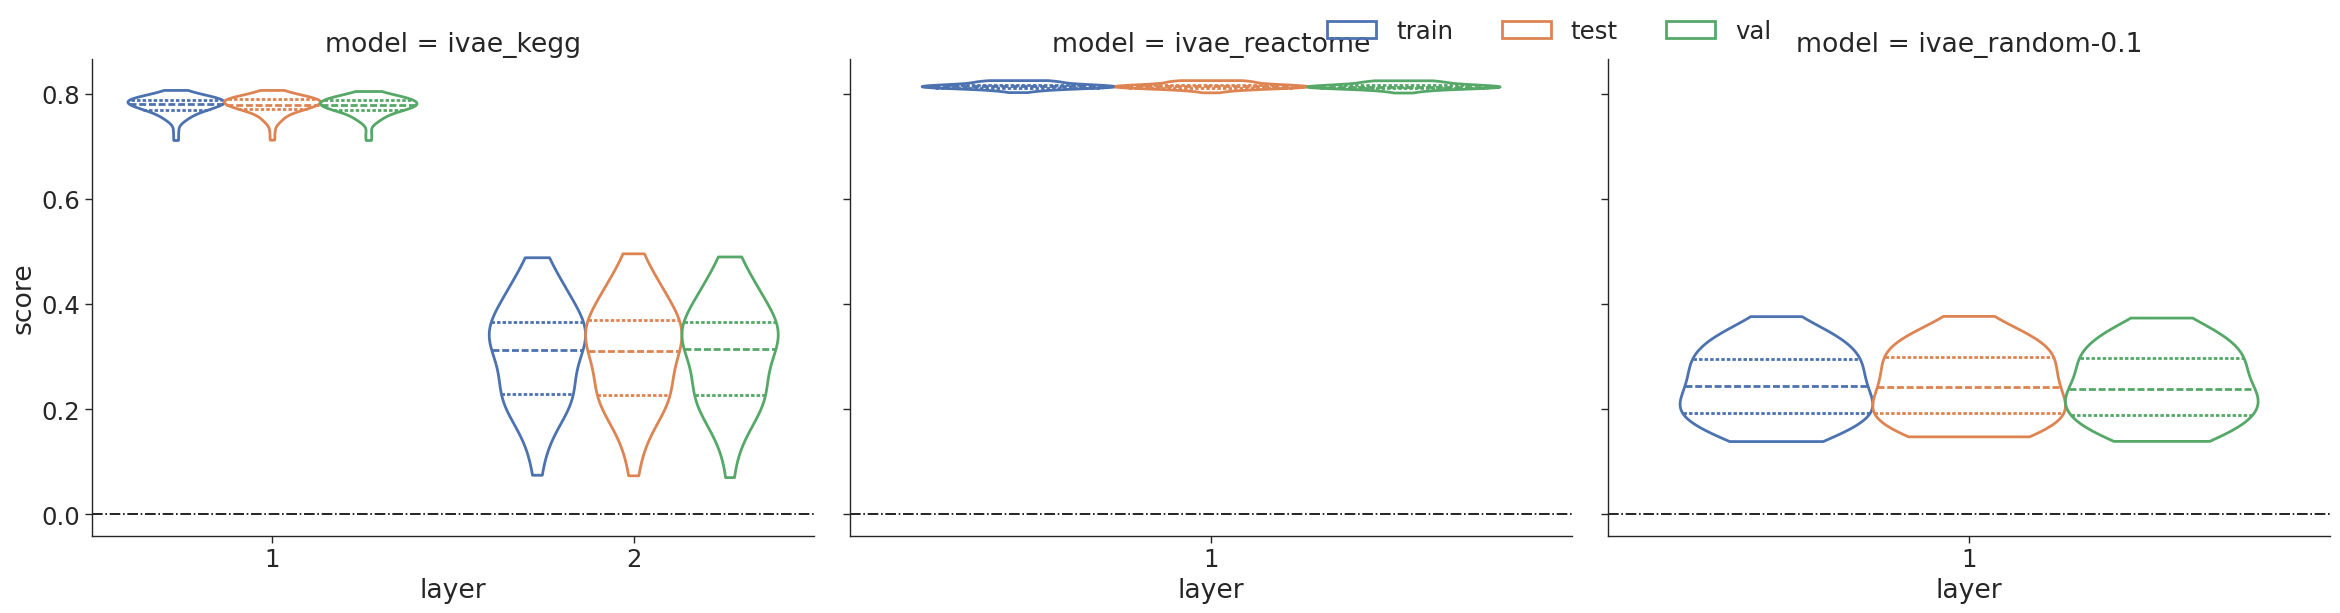

In [15]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="paper", font_scale=2, style="ticks", rc=custom_params)
fac = 0.7

g = sns.catplot(
    data=informed_scores,
    kind="violin",
    col="model",
    height=9 * fac,
    aspect=16 / 9 * fac,
    sharey=True,
    sharex=False,
    x="layer",
    y="score",
    hue="split",
    split=False,
    cut=0,
    fill=False,
    density_norm="count",
    inner="quart",
    linewidth=2,
    legend_out=False,
    col_wrap=4,
)

sns.move_legend(
    g,
    "lower center",
    bbox_to_anchor=(0.5, 0.9),
    ncol=3,
    title=None,
    frameon=False,
)

g.refline(y=0, color="black", linestyle="dashdot")

In [16]:
informed_scores.head()

,split,layer,score,model
0,train,1,0.787101,ivae_kegg
1,train,1,0.728475,ivae_kegg
2,train,1,0.783498,ivae_kegg
3,train,1,0.769732,ivae_kegg
4,train,1,0.797193,ivae_kegg


In [17]:
clustering_scores["kind"] = "clustering"
informed_scores["kind"] = "informed"

In [18]:
scores = (
    pd.concat((clustering_scores, informed_scores), axis=0, ignore_index=True)
    .query("layer==1 & split=='test'")
    .drop(["layer", "split"], axis=1)
)
scores.head()

,score,model,kind
20,0.445743,ivae_kegg,clustering
21,0.427972,ivae_kegg,clustering
22,0.381412,ivae_kegg,clustering
23,0.349151,ivae_kegg,clustering
24,0.427790,ivae_kegg,clustering


<Axes: xlabel='score', ylabel='model'>

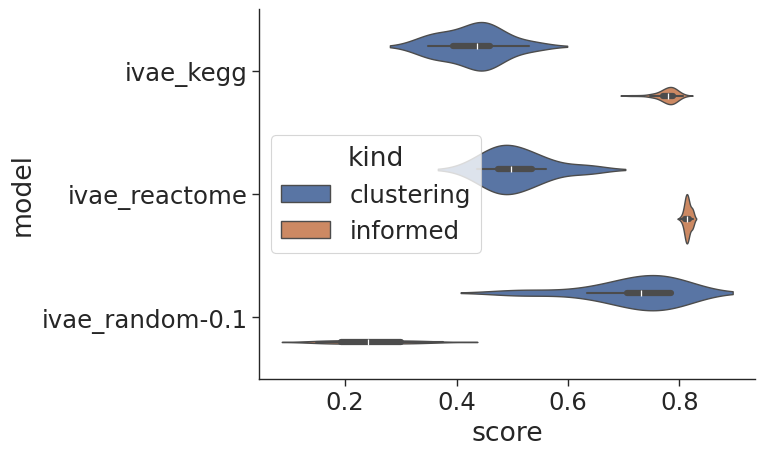

In [19]:
sns.violinplot(data=scores, x="score", y="model", hue="kind")

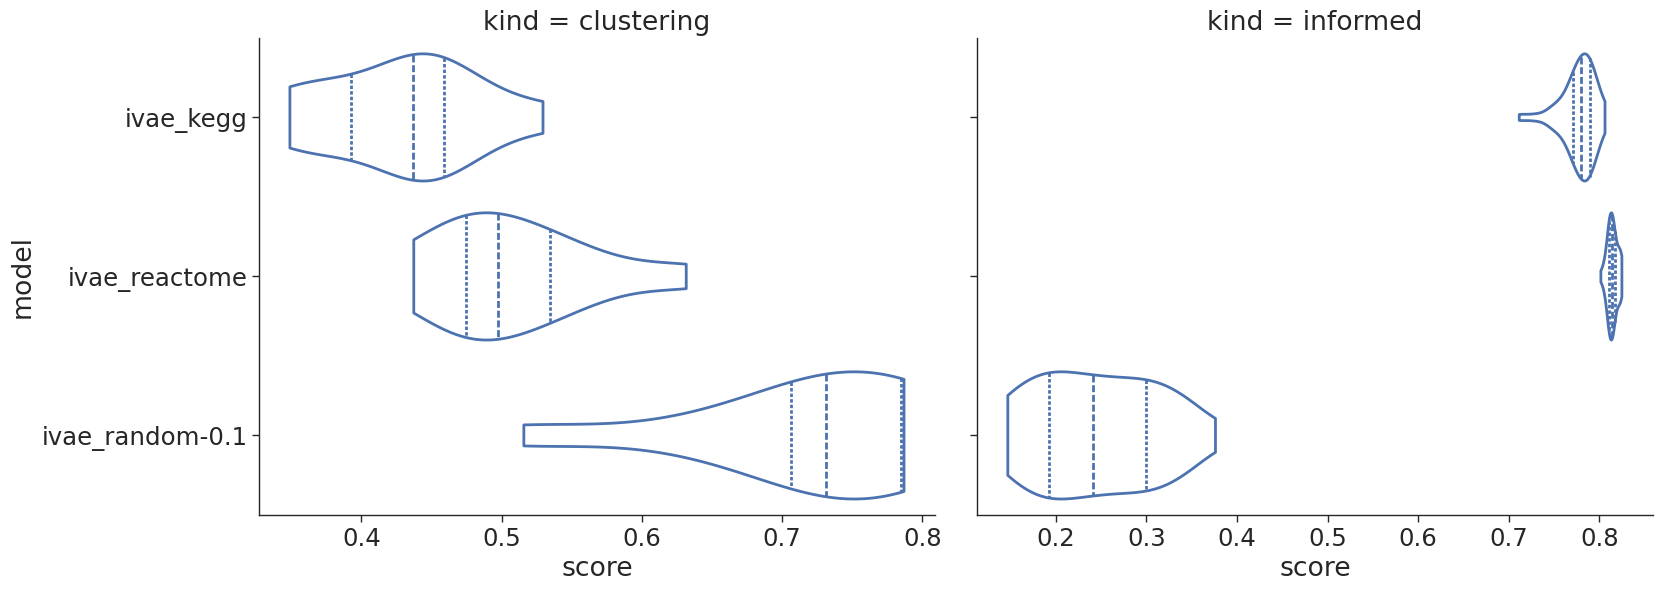

In [20]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="paper", font_scale=2, style="ticks", rc=custom_params)
fac = 0.7

g = sns.catplot(
    data=scores,
    kind="violin",
    col="kind",
    height=9 * fac,
    aspect=16 / 9 * fac,
    sharey=True,
    sharex=False,
    y="model",
    x="score",
    split=False,
    cut=0,
    fill=False,
    density_norm="count",
    inner="quart",
    linewidth=2,
    legend_out=False,
    col_wrap=4,
)

# sns.move_legend(
#     g,
#     "lower center",
#     bbox_to_anchor=(0.5, 0.9),
#     ncol=3,
#     title=None,
#     frameon=False,
# )

# g.refline(y=0, color="black", linestyle="dashdot")

In [21]:
scores.groupby(["model", "kind"]).describe()

score                                          \
                           count      mean       std       min       25%   
model           kind                                                       
ivae_kegg       clustering  10.0  0.429753  0.054606  0.349151  0.393007   
                informed    45.0  0.777237  0.018542  0.711560  0.770907   
ivae_random-0.1 clustering  10.0  0.716570  0.086086  0.515891  0.706239   
                informed    45.0  0.245338  0.065331  0.147205  0.192709   
ivae_reactome   clustering  10.0  0.509446  0.056355  0.437431  0.474499   
                informed    45.0  0.814584  0.005518  0.801627  0.810659   

                                                          
                                 50%       75%       max  
model           kind                                      
ivae_kegg       clustering  0.436857  0.459296  0.529540  
                informed    0.779244  0.789198  0.806189  
ivae_random-0.1 clustering  0.731041  0.784660  0.786840  
                informed    0.241483  0.299852  0.376341  
ivae_reactome   clustering  0.497221  0.534616  0.631630  
                informed    0.813945  0.817375  0.824823

In [22]:
informed_scores.groupby(["model", "kind", "split", "layer"]).describe()

score                                \
                                     count      mean       std       min   
model           kind     split layer                                       
ivae_kegg       informed test  1      45.0  0.777237  0.018542  0.711560   
                               2      45.0  0.307103  0.096780  0.073059   
                         train 1      45.0  0.776991  0.018571  0.710903   
                               2      45.0  0.307198  0.096041  0.074184   
                         val   1      45.0  0.775283  0.018488  0.710924   
                               2      45.0  0.307004  0.096216  0.069676   
ivae_random-0.1 informed test  1      45.0  0.245338  0.065331  0.147205   
                         train 1      45.0  0.245523  0.064921  0.138195   
                         val   1      45.0  0.246279  0.065840  0.138573   
ivae_reactome   informed test  1      45.0  0.814584  0.005518  0.801627   
                         train 1      45.0  0.814627  0.005433  0.802028   
                         val   1      45.0  0.814133  0.005527  0.801215   

                                                                              
                                           25%       50%       75%       max  
model           kind     split layer                                          
ivae_kegg       informed test  1      0.770907  0.779244  0.789198  0.806189  
                               2      0.227031  0.309945  0.368697  0.495354  
                         train 1      0.769732  0.779930  0.788802  0.806171  
                               2      0.229100  0.313233  0.366009  0.487892  
                         val   1      0.768658  0.778247  0.787632  0.804092  
                               2      0.227051  0.314271  0.366392  0.489393  
ivae_random-0.1 informed test  1      0.192709  0.241483  0.299852  0.376341  
                         train 1      0.191814  0.243870  0.295070  0.375808  
                         val   1      0.188962  0.238371  0.297804  0.373137  
ivae_reactome   informed test  1      0.810659  0.813945  0.817375  0.824823  
                         train 1      0.810828  0.814030  0.817311  0.824835  
                         val   1      0.810321  0.813583  0.817321  0.824477